In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
pd.set_option('display.max_rows', 200)

### Read in loan data from 2007 to 2015. The data has been split into 21 different files so that they can pushed to Github

In [3]:
def read_loan_data():
    """Read in data from 21 files and concatentate into one dataframe"""
    dataframes = []
    for i in range(21):
        filename = './data/LoanStats_2007_to_2015_' + str(i) + '.csv'
        df = pd.read_csv(filename, low_memory=False)
        dataframes.append(df)
    loans = pd.concat(dataframes)
    return loans

In [4]:
loans = read_loan_data()

In [5]:
loans.shape

(887449, 143)

In [6]:
loans.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501        NaN     5000.0       5000.0           4975.0   36 months   
1  1077430        NaN     2500.0       2500.0           2500.0   60 months   
2  1077175        NaN     2400.0       2400.0           2400.0   36 months   
3  1076863        NaN    10000.0      10000.0          10000.0   36 months   
4  1075358        NaN     3000.0       3000.0           3000.0   60 months   

  int_rate  installment grade sub_grade             ...               \
0   10.65%       162.87     B        B2             ...                
1   15.27%        59.83     C        C4             ...                
2   15.96%        84.33     C        C5             ...                
3   13.49%       339.31     C        C1             ...                
4   12.69%        67.79     B        B5             ...                

  hardship_amount hardship_start_date hardship_end_date  \
0             NaN                 NaN               NaN   
1             NaN                 NaN               NaN   
2             NaN                 NaN               NaN   
3             NaN                 NaN               NaN   
4             NaN                 NaN               NaN   

   payment_plan_start_date hardship_length hardship_dpd hardship_loan_status  \
0                      NaN             NaN          NaN                  NaN   
1                      NaN             NaN          NaN                  NaN   
2                      NaN             NaN          NaN                  NaN   
3                      NaN             NaN          NaN                  NaN   
4                      NaN             NaN          NaN                  NaN   

  orig_projected_additional_accrued_interest hardship_payoff_balance_amount  \
0                                        NaN                            NaN   
1                                        NaN                            NaN   
2                                        NaN                            NaN   
3                                        NaN                            NaN   
4                                        NaN                            NaN   

  hardship_last_payment_amount  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  

[5 rows x 143 columns]

## Some exploratory data analysis

### What kind of interest rate are borrowers paying?

In [7]:
# Remove 9 loans with missing interest rates. These were never funded
loans = loans[loans.int_rate.notnull()]

In [8]:
# Strip out % and convert to float
loans.int_rate = loans.int_rate.apply(lambda x: float(x.rstrip('%')))

In [9]:
loans.int_rate.describe()

count    887440.000000
mean         13.245705
std           4.382385
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

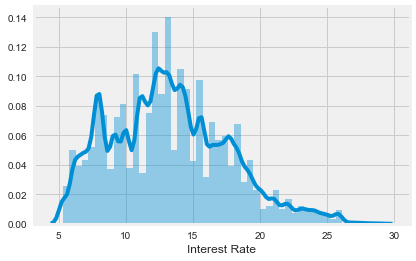

In [10]:
sns.distplot(loans.int_rate, axlabel='Interest Rate');

### How long are the loan terms?

In [11]:
loans.term.value_counts(1)

 36 months    0.699956
 60 months    0.300044
Name: term, dtype: float64

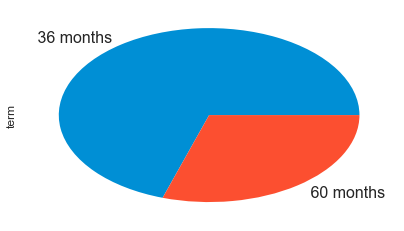

In [12]:
loans.term.value_counts().plot(kind='pie', fontsize=16);

### How much are people borrowing?

In [13]:
loans.loan_amnt.describe()

count    887440.000000
mean      14755.167673
std        8435.379336
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

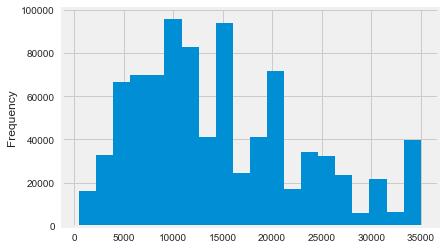

In [14]:
loans.loan_amnt.plot(kind='hist', bins=20, x='Loan Amount');

Seems like people like to round up to multiples of 5k such as 10k and 15k when applying.

### What are people taking these loans out for?

In [15]:
purposes = loans.purpose.value_counts()
purposes

debt_consolidation    524253
credit_card           206194
home_improvement       51834
other                  42896
major_purchase         17277
small_business         10378
car                     8864
medical                 8541
moving                  5415
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

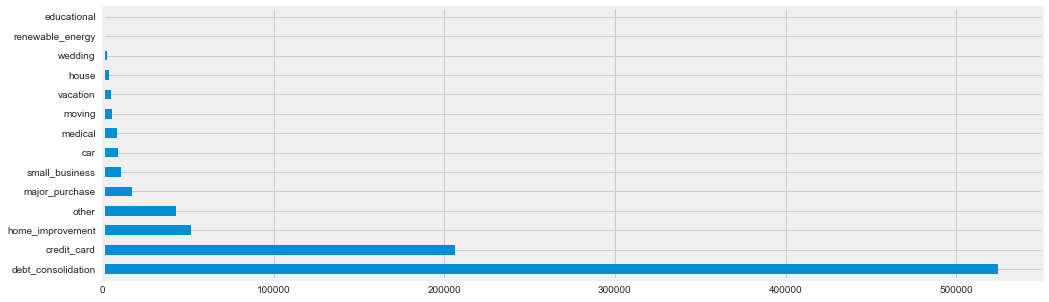

In [16]:
purposes.plot.barh(figsize=(15, 5));

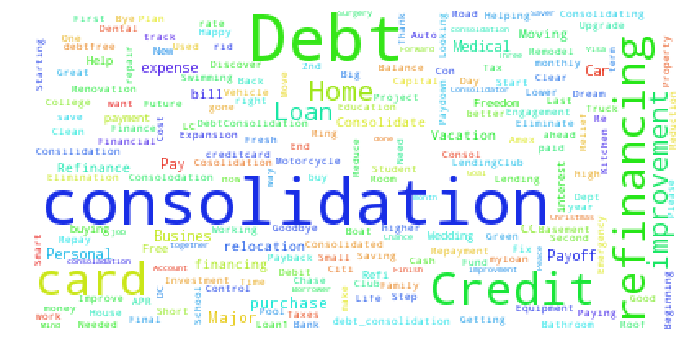

In [17]:
titles = loans.title.str.cat(sep=',')
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_font_size=40, relative_scaling=0.5)
wordcloud.generate(titles)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Are the borrowers renters or homeowners?

In [18]:
loans.home_ownership.value_counts()

MORTGAGE    443591
RENT        356136
OWN          87478
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

In [19]:
loans.loc[(loans.home_ownership == 'ANY') | (loans.home_ownership == 'NONE'), 'home_ownership'] = 'OTHER'

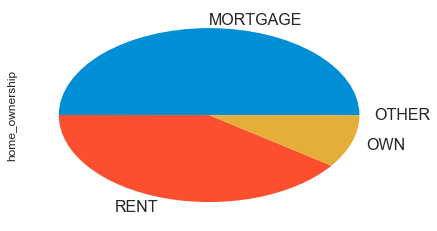

In [20]:
loans.home_ownership.value_counts().plot(kind='pie', fontsize=16);

### LendingClub rates their loans from A to G, with subgrades 1 to 5

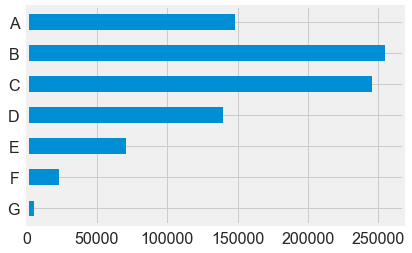

In [21]:
loans.grade.value_counts().sort_index(ascending=False).plot(kind='barh', fontsize=16);

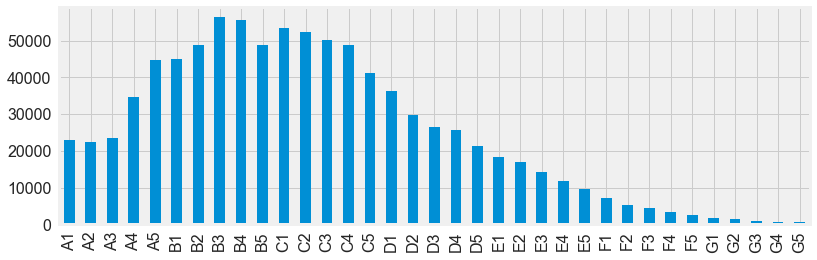

In [22]:
loans.sub_grade.value_counts().sort_index().plot(kind='bar', fontsize=16, figsize=(12, 4));

### Lending Club has grown loan origination volumes over the 8 years

In [46]:
from datetime import datetime
loans['issue_date'] = loans.issue_d.apply(lambda x: datetime.strptime(x, '%b-%Y').date())

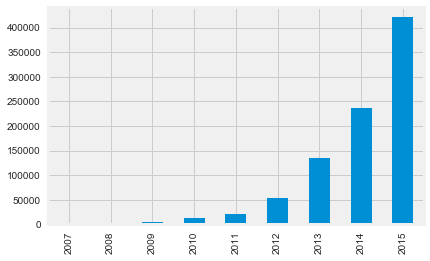

In [26]:
loans.issue_date.apply(lambda x: x.year).value_counts().sort_index().plot(kind='bar');

### Where do these borrowers live?

In [ ]:
loans.addr_state.value_counts() #  51 states including DC as it's own

### We want to predict whether a borrower will default or not

In [27]:
loans.loan_status.value_counts()

Fully Paid                                             453555
Current                                                295717
Charged Off                                            116280
Late (31-120 days)                                      10079
In Grace Period                                          6513
Late (16-30 days)                                        2536
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    11
Name: loan_status, dtype: int64

In [28]:
loans['defaulted'] = loans.loan_status.map({'Fully Paid': 0,
                                            'Current': 0,
                                            'Charged Off': 1,
                                            'Late (31-120 days)': 1,
                                            'In Grace Period': 0,
                                            'Late (16-30 days)': 0,
                                            'Does not meet the credit policy. Status:Fully Paid': 0,
                                            'Does not meet the credit policy. Status:Charged Off': 1,
                                            'Default': 1
                                           })

In [30]:
loans = loans.drop('loan_status', axis=1)

ValueError: labels ['loan_status'] not contained in axis

### What are our predictors?

In [31]:
# Member id and loan URL can be removed
loans = loans.drop(['url', 'member_id'], axis=1)

In [32]:
loans.application_type.value_counts()

INDIVIDUAL    886929
JOINT            511
Name: application_type, dtype: int64

In [33]:
# Since there are only 511 Joint accounts, let's remove them to simplify our analysis
loans = loans[loans.application_type == 'INDIVIDUAL']
joint_app_columns = ['revol_bal_joint', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
                     'sec_app_num_rev_accts', 'sec_app_mths_since_last_major_derog', 'sec_app_fico_range_high',
                     'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
                     'sec_app_revol_util', 'sec_app_open_il_6m', 'sec_app_chargeoff_within_12_mths',
                     'sec_app_collections_12_mths_ex_med', 'sec_app_fico_range_low']
loans = loans.drop(joint_app_columns, axis=1)

In [34]:
# Remove policy code since it is 1 for all rows
loans = loans.drop('policy_code', axis=1)

In [35]:
# last_credit_pull_d => The most recent month LC pulled credit for this loan. Remove since it's irrelevant
loans = loans.drop('last_credit_pull_d', axis=1)

In [ ]:
# Show that max range is small, so that it's safe to take mean
#loans.loc[:, ['fico_range_low', 'fico_range_high', 'fico']].head(20)

In [36]:
# Fico is pulled multiple times while loan is being invested. Take the mean of high and low
loans['fico'] = (loans.fico_range_low + loans.fico_range_high) / 2
loans = loans.drop(['fico_range_low', 'fico_range_high'], axis=1)

In [37]:
# Hardship program allows borrowers who had an unexpected life event make interest only payments. Since it was
# introduced recently in May, 2017, it only affects some current loans. So it's best to remove those columns.
hardship_columns = ['orig_projected_additional_accrued_interest', 'hardship_status', 'payment_plan_start_date',
                   'hardship_type', 'hardship_reason', 'deferral_term', 'hardship_amount', 'hardship_end_date',
                   'hardship_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status',
                   'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'hardship_flag']
loans = loans.drop(hardship_columns, axis=1)

In [38]:
# These fields were added on December 2015 and only exist for new loans
dec_2015_columns = ['il_util', 'mths_since_rcnt_il', 'open_acc_6m', 'inq_last_12m', 'open_il_6m', 'open_il_12m',
                   'open_il_24m', 'total_bal_il', 'open_rv_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
                   'inq_fi', 'total_cu_tl', 'all_util']
loans = loans.drop(dec_2015_columns, axis=1)

In [39]:
# Description is missing for most loans
loans = loans.drop('desc', axis=1)

In [40]:
# We can drop last payment date and next payment date since they are irrelevant
loans = loans.drop(['next_pymnt_d', 'last_pymnt_d'], axis=1)

In [68]:
# We can drop title since we already have purpose as a categorical feature
loans = loans.drop('title', axis=1)

In [110]:
loans.shape

(886784, 90)

In [ ]:
# Safe to delete rows where these columns are null
# annual_inc, 

In [47]:
loans[loans.annual_inc.isnull()].issue_date

42450    2007-08-01
42451    2007-08-01
42481    2007-07-01
42534    2007-06-01
Name: issue_date, dtype: object

In [111]:
loans[loans.acc_now_delinq.isnull() | loans.total_acc.isnull() | loans.pub_rec.isnull() | loans.open_acc.isnull()
      | loans.delinq_amnt.isnull() | loans.inq_last_6mths.isnull() | loans.earliest_cr_line.isnull() 
      | loans.delinq_2yrs.isnull()].shape[0]

0

In [81]:
# Remove these loans from the summer of 2007
missing_summer_2007 = ['delinq_2yrs', 'acc_now_delinq', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
                      'delinq_amnt', 'total_acc']
loans = loans.dropna(subset=missing_summer_2007)

In [84]:
loans[loans.tax_liens.isnull()].issue_d.value_counts()

Jul-2007    57
Aug-2007    12
Sep-2007     3
Jun-2007     3
Oct-2007     1
Name: issue_d, dtype: int64

In [87]:
# Remove loans where tax liens are not present since they were issued early on
loans = loans[loans.tax_liens.notnull()]
loans.shape

(886824, 90)

In [95]:
# chargeoff_within_12_mths and collections_12_mths_ex_med
loans[loans.chargeoff_within_12_mths.isnull() | loans.collections_12_mths_ex_med.isnull()].issue_d.value_counts()

Aug-2007    37
Jul-2007     2
Oct-2007     1
Name: issue_d, dtype: int64

In [96]:
# Drop these two since they are from earlier loans
loans = loans.dropna(subset=['chargeoff_within_12_mths', 'collections_12_mths_ex_med'])

In [145]:
loans.pub_rec_bankruptcies.value_counts()

0.0     787748
1.0      91923
2.0       4586
3.0        947
4.0        225
5.0         82
6.0         24
7.0         14
8.0          6
9.0          2
12.0         1
11.0         1
Name: pub_rec_bankruptcies, dtype: int64

In [144]:
# Public records are derogatory records such as bankruptcy, civil judgment, and tax liens
loans[loans.mths_since_last_record.isnull() & (loans.pub_rec > 0) & (loans.tax_liens > 0)
      & (loans.pub_rec_bankruptcies > 0)].shape

(0, 90)

In [147]:
# Since the other three columns for public records report 0, the months since last record should be 0
loans.mths_since_last_record.fillna(value=0, inplace=True)

In [120]:
# Find all the columns with null values
loans.isnull().sum().sort_values(ascending=False)

mths_since_last_record            749939
mths_since_recent_bc_dlq          679290
mths_since_last_major_derog       665208
mths_since_recent_revol_delinq    596022
mths_since_last_delinq            454071
mths_since_recent_inq             136510
num_tl_120dpd_2m                   97477
mo_sin_old_il_acct                 95680
pct_tl_nvr_dlq                     70284
avg_cur_bal                        70143
mo_sin_rcnt_rev_tl_op              70132
num_rev_accts                      70132
mo_sin_old_rev_tl_op               70132
num_tl_30dpd                       70131
num_actv_rev_tl                    70131
tot_coll_amt                       70131
tot_cur_bal                        70131
total_rev_hi_lim                   70131
num_tl_90g_dpd_24m                 70131
mo_sin_rcnt_tl                     70131
num_accts_ever_120_pd              70131
num_actv_bc_tl                     70131
tot_hi_cred_lim                    70131
total_il_high_credit_limit         70131
num_il_tl       

In [136]:
#loans[loans.mths_since_last_record.isnull()][['mths_since_last_record','delinq_amnt','delinq_2yrs', 'issue_d', 'pub_rec']]
loans[loans.mths_since_last_record.notnull() & (loans.pub_rec == 0)][['mths_since_last_record', 'pub_rec']]

mths_since_last_record  pub_rec
35075                     0.0      0.0
35127                     0.0      0.0
35431                     0.0      0.0
38512                     0.0      0.0
38786                     0.0      0.0
38797                     0.0      0.0
38945                     0.0      0.0
39040                     0.0      0.0
39073                     0.0      0.0
39074                     0.0      0.0
39075                     0.0      0.0
39076                     0.0      0.0
39077                     0.0      0.0
39078                     0.0      0.0
39079                     0.0      0.0
39080                     0.0      0.0
39081                     0.0      0.0
39083                     0.0      0.0
39085                     0.0      0.0
39086                     0.0      0.0
39087                     0.0      0.0
39088                     0.0      0.0
39089                     0.0      0.0
39090                     0.0      0.0
39091                     0.0      0.0
39092                     0.0      0.0
39093                     0.0      0.0
39095                     0.0      0.0
39096                     0.0      0.0
39097                     0.0      0.0
39099                     0.0      0.0
39100                     0.0      0.0
39101                     0.0      0.0
39102                     0.0      0.0
39103                     0.0      0.0
39104                     0.0      0.0
39105                     0.0      0.0
39106                     0.0      0.0
39107                     0.0      0.0
39108                     0.0      0.0
39109                     0.0      0.0
39110                     0.0      0.0
39111                     0.0      0.0
39112                     0.0      0.0
39113                     0.0      0.0
39114                     0.0      0.0
39115                     0.0      0.0
39116                     0.0      0.0
39117                     0.0      0.0
39118                     0.0      0.0
39119                     0.0      0.0
39120                     0.0      0.0
39122                     0.0      0.0
39124                     0.0      0.0
39125                     0.0      0.0
39126                     0.0      0.0
39127                     0.0      0.0
39128                     0.0      0.0
39129                     0.0      0.0
39130                     0.0      0.0
39131                     0.0      0.0
39132                     0.0      0.0
39133                     0.0      0.0
39134                     0.0      0.0
39135                     0.0      0.0
39136                     0.0      0.0
39137                     0.0      0.0
39138                     0.0      0.0
39139                     0.0      0.0
39140                     0.0      0.0
39141                     0.0      0.0
39142                     0.0      0.0
39143                     0.0      0.0
39144                     0.0      0.0
39145                     0.0      0.0
39146                     0.0      0.0
39147                     0.0      0.0
39148                     0.0      0.0
39149                     0.0      0.0
39150                     0.0      0.0
39151                     0.0      0.0
39152                     0.0      0.0
39154                     0.0      0.0
39155                     0.0      0.0
39156                     0.0      0.0
39157                     0.0      0.0
39158                     0.0      0.0
39160                     0.0      0.0
39161                     0.0      0.0
39162                     0.0      0.0
39163                     0.0      0.0
39164                     0.0      0.0
39165                     0.0      0.0
39166                     0.0      0.0
39167                     0.0      0.0
39168                     0.0      0.0
39169                     0.0      0.0
39170                     0.0      0.0
39171                     0.0      0.0
39172                     0.0      0.0
...                       ...      ...
42340                     0.0

In [119]:
# revol_util => Revolving line utilization rate, or the amount of credit the borrower is using relative to all available
# revolving credit.
# It's missing for 502 of the rows and not at any particular point in time.
#loans[loans.revol_util.isnull()].issue_date.value_counts().sort_index()
# revol_bal => Total credit revolving balance.
# num_rev_accts => Number of revolving accounts. Includes closed accounts
# open_acc => Number of open credit lines in borrower's credit file. Does this included both revolving and fixed installment?
# num_actv_rev_tl => Number of currently active revolving accounts
# num_actv_bc_tl => Number of currently active bank card accounts
# avg_cur_balance => Avg current balance of all accounts


# def impute_revol_util(df):
    # Calculate 
    

loans[['revol_bal', 'num_rev_accts', 'open_acc', 'num_actv_rev_tl', 'avg_cur_bal', 'tot_cur_bal', 'dti', 'annual_inc']].head(20)


revol_bal  num_rev_accts  open_acc  num_actv_rev_tl  avg_cur_bal  \
0     13648.0            NaN       3.0              NaN          NaN   
1      1687.0            NaN       3.0              NaN          NaN   
2      2956.0            NaN       2.0              NaN          NaN   
3      5598.0            NaN      10.0              NaN          NaN   
4     27783.0            NaN      15.0              NaN          NaN   
5      7963.0            NaN       9.0              NaN          NaN   
6     17726.0            NaN       7.0              NaN          NaN   
7      8221.0            NaN       4.0              NaN          NaN   
8      5210.0            NaN      11.0              NaN          NaN   
9      9279.0            NaN       2.0              NaN          NaN   
10     4032.0            NaN      14.0              NaN          NaN   
11    23336.0            NaN      12.0              NaN          NaN   
12    10452.0            NaN       4.0              NaN          NaN   
13     7323.0            NaN      11.0              NaN          NaN   
14    11997.0            NaN      14.0              NaN          NaN   
15     6524.0            NaN      11.0              NaN          NaN   
16    24043.0            NaN      14.0              NaN          NaN   
17    22836.0            NaN      20.0              NaN          NaN   
18        0.0            NaN       4.0              NaN          NaN   
19     7314.0            NaN       8.0              NaN          NaN   

    tot_cur_bal    dti  annual_inc  
0           NaN  27.65    24000.00  
1           NaN   1.00    30000.00  
2           NaN   8.72    12252.00  
3           NaN  20.00    49200.00  
4           NaN  17.94    80000.00  
5           NaN  11.20    36000.00  
6           NaN  23.51    47004.00  
7           NaN   5.35    48000.00  
8           NaN   5.55    40000.00  
9           NaN  18.08    15000.00  
10          NaN  16.12    72000.00  
11          NaN  10.78    75000.00  
12          NaN  10.08    30000.00  
13          NaN  12.56    15000.00  
14          NaN   7.06   100000.00  
15          NaN  20.31    28000.00  
16          NaN  18.60    42000.00  
17          NaN  10.52   110000.00  
18          NaN  18.44    84000.00  
19          NaN   9.86    77385.19